<a href="https://colab.research.google.com/github/jechavarria12/Parcial_1_Fraude/blob/main/Parcial_1_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Parcial 1


# 1. Procesamiento de Datos

##Preparación


In [ ]:
#Instalación de las librerías
!pip install -q pandas
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q yellowbrick
!pip install -q scikit-learn
!pip install -q imbalanced-learn
!pip install -q tqdm
!pip install -q joblib
!pip install -q huggingface_hub
!pip install -q datasets
!pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5f0d3a1ffc61c25448308307256ed31efdd0de664e99df516fa5ee89a9f7954d
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405e

In [ ]:
# Importar las librerías necesarias y definir la semilla
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

SEED = 42

##Base de Datos

Este estudio se centrará en predecir si una transacción financiera es fraudulenta o no utilizando la base de datos `credit_fraud_detection `de Hugging Face. Para esto, se proporciona información detallada sobre cada transacción como: montos, saldos previos y posteriores, y tipos de operación como transacciones en efectivo, pagos o transferencias. Tmbién, incluye indicadores binarios que permiten clasificar si una transacción es fraudulenta o si ha resultado en un sobregiro no autorizado. La variable que se quiere predecir es la variable binaria `"isFraud"` que toma un valor de 1 si la transacción es fraudulenta y 0 de lo contrario. Este conjunto de datos es útil porque tiene muchas observaciónes (más de 3 millones), lo que permite entrenar los modelos de de aprendizaje automático para que aprendan a detectar fraudes en tiempo real, ayudando a las instituciones financieras a prevenir pérdidas y mejorar la seguridad de sus sistemas de pago.

In [ ]:
# Cargar la base de datos
dataset = load_dataset("rohan-chandrashekar/credit_fraud_detection")
dataset

README.md:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/134M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/28.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/28.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2599503 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/557036 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/557037 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['amount', 'nameOrig', 'oldBalanceOrig', 'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest', 'isFraud', 'isUnauthorizedOverdraft', 'action__CASH_IN', 'action__CASH_OUT', 'action__DEBIT', 'action__PAYMENT', 'action__TRANSFER'],
        num_rows: 2599503
    })
    validation: Dataset({
        features: ['amount', 'nameOrig', 'oldBalanceOrig', 'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest', 'isFraud', 'isUnauthorizedOverdraft', 'action__CASH_IN', 'action__CASH_OUT', 'action__DEBIT', 'action__PAYMENT', 'action__TRANSFER'],
        num_rows: 557036
    })
    test: Dataset({
        features: ['amount', 'nameOrig', 'oldBalanceOrig', 'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest', 'isFraud', 'isUnauthorizedOverdraft', 'action__CASH_IN', 'action__CASH_OUT', 'action__DEBIT', 'action__PAYMENT', 'action__TRANSFER'],
        num_rows: 557037
    })
})

In [ ]:
#Tamaño de la base de datos
dataset.shape

{'train': (2599503, 14), 'validation': (557036, 14), 'test': (557037, 14)}

La base de datos se compone de 14 columnas, que son las diferentes variables y 3.713.576 de observaciones que ya están divididas en el grupo de entrenameinto, validación y prueba.

El conjunto de datos de detección de fraude crediticio disponible en [Hugging Face](https://huggingface.co/datasets/rohan-chandrashekar/credit_fraud_detection) contiene las siguientes 14 variables representadas en las columnas:

| **Columna**                  | **Descripción**                                                                                                                                                                                                 | **Tipo de Variable** |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------|
| `amount`                      | Monto de la transacción.                                                                                                                                                                                        | Numérica (float64)   |
| `nameOrig`                    | Identificador único del cliente que inicia la transacción.                                                                                                                                                      | Categórica (int64)   |
| `oldBalanceOrig`              | Saldo de la cuenta del originador antes de la transacción.                                                                                                                                                      | Numérica (float64)   |
| `newBalanceOrig`              | Saldo de la cuenta del originador después de la transacción.                                                                                                                                                    | Numérica (float64)   |
| `nameDest`                    | Identificador único del cliente o entidad que recibe la transacción.                                                                                                                                            | Categórica (int64)   |
| `oldBalanceDest`              | Saldo de la cuenta del destinatario antes de la transacción.                                                                                                                                                    | Numérica (float64)   |
| `newBalanceDest`              | Saldo de la cuenta del destinatario después de la transacción.                                                                                                                                                  | Numérica (float64)   |
| `isFraud`                     | Indicador de si la transacción es fraudulenta (1) o no (0).                                                                                                                                                     | Binaria (int64)      |
| `isUnauthorizedOverdraft`     | Indicador de si la transacción resultó en un sobregiro no autorizado (1) o no (0).                                                                                                                              | Binaria (int64)      |
| `action__CASH_IN`             | Indicador de si la acción de la transacción es un depósito de efectivo (1) o no (0).                                                                                                                            | Binaria (int64)      |
| `action__CASH_OUT`            | Indicador de si la acción de la transacción es un retiro de efectivo (1) o no (0).                                                                                                                              | Binaria (int64)      |
| `action__DEBIT`               | Indicador de si la acción de la transacción es un débito (1) o no (0).                                                                                                                                           | Binaria (int64)      |
| `action__PAYMENT`             | Indicador de si la acción de la transacción es un pago (1) o no (0).                                                                                                                                            | Binaria (int64)      |
| `action__TRANSFER`            | Indicador de si la acción de la transacción es una transferencia (1) o no (0).                                                                                                                                   | Binaria (int64)      |


In [ ]:
#División de los datos: 80% train y 20% test
df_train = pd.DataFrame(list(dataset['train'].take(80000)))
df_test = pd.DataFrame(list(dataset['test'].take(20000)))

In [ ]:
display(df_train.head())
display(df_test.head())

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,83567.84,1270,0.00,83567.84,17600,34594.35,34594.35,0,0,1,0,0,0,0
1,1221867.91,70795,1221867.91,0.00,22281,34873.36,34873.36,1,0,0,1,0,0,0
2,322138.17,2881,1595257.55,1917395.71,37826,121986.83,121986.83,0,0,1,0,0,0,0
3,89476.25,21364,1018602.32,1108078.57,32142,44718.52,44718.52,0,0,1,0,0,0,0
4,14372.57,20391,603534.13,617906.69,9164,108732.54,108732.54,0,0,1,0,0,0,0


,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,73800.89,15374,2534460.75,2460659.86,35922,81483.02,81483.02,0,0,0,1,0,0,0
1,196871.36,14559,1539057.79,1735929.16,48287,54029.17,54029.17,0,0,1,0,0,0,0
2,230141.98,22934,502864.24,733006.22,31892,8058.23,8058.23,0,0,1,0,0,0,0
3,227774.04,8379,60025.05,287799.09,978,11786.02,11786.02,0,0,1,0,0,0,0
4,65725.33,5391,2851847.83,2917573.16,35100,21051.19,21051.19,0,0,1,0,0,0,0


In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amount                   80000 non-null  float64
 1   nameOrig                 80000 non-null  int64  
 2   oldBalanceOrig           80000 non-null  float64
 3   newBalanceOrig           80000 non-null  float64
 4   nameDest                 80000 non-null  int64  
 5   oldBalanceDest           80000 non-null  float64
 6   newBalanceDest           80000 non-null  float64
 7   isFraud                  80000 non-null  int64  
 8   isUnauthorizedOverdraft  80000 non-null  int64  
 9   action__CASH_IN          80000 non-null  int64  
 10  action__CASH_OUT         80000 non-null  int64  
 11  action__DEBIT            80000 non-null  int64  
 12  action__PAYMENT          80000 non-null  int64  
 13  action__TRANSFER         80000 non-null  int64  
dtypes: float64(5), int64(9

##Análisis descriptivo de los datos


###Análisis Descriptivo datos de entrenamiento

In [ ]:
#Análisis descriptivo de los datos de entrenamiento:
from ydata_profiling import ProfileReport
reporte_train = ProfileReport(df_train, title="Profiling Report Train dataset")
reporte_train.to_file("reporte_train.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

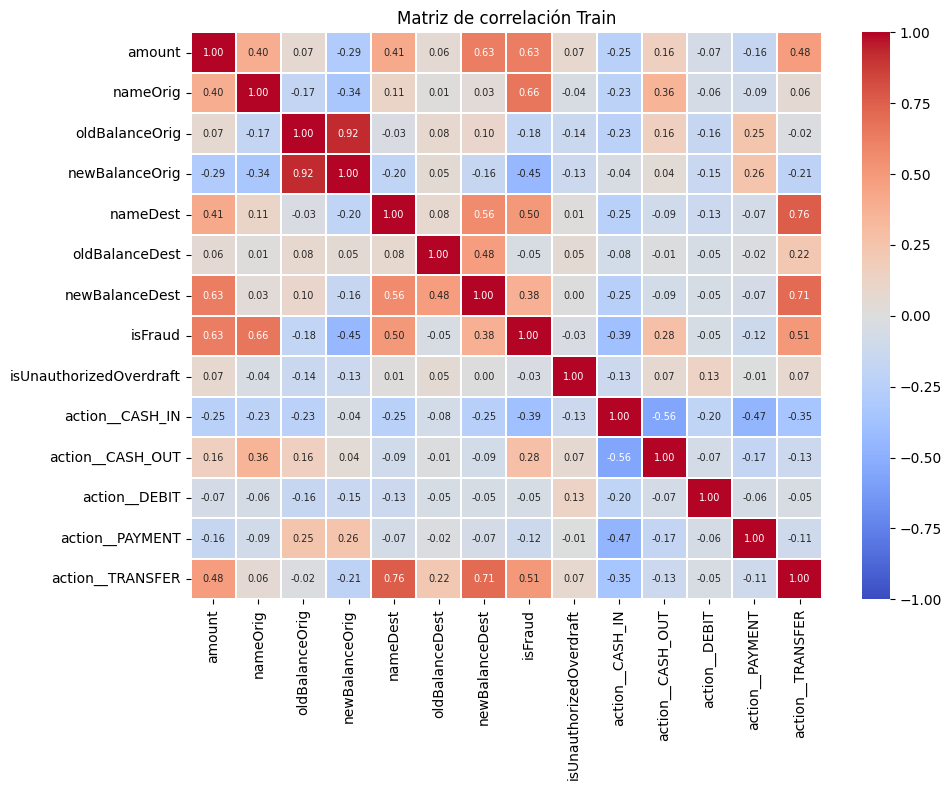

In [ ]:
#Hacer matriz de correlación

numeric_df_train = df_train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df_train.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 7}, fmt=".2f", linewidths=0.3)

plt.title('Matriz de correlación Train', fontsize=12)
plt.tight_layout()
plt.show()


Porcentajes:
Clase 0: 90.96%
Clase 1: 9.04%


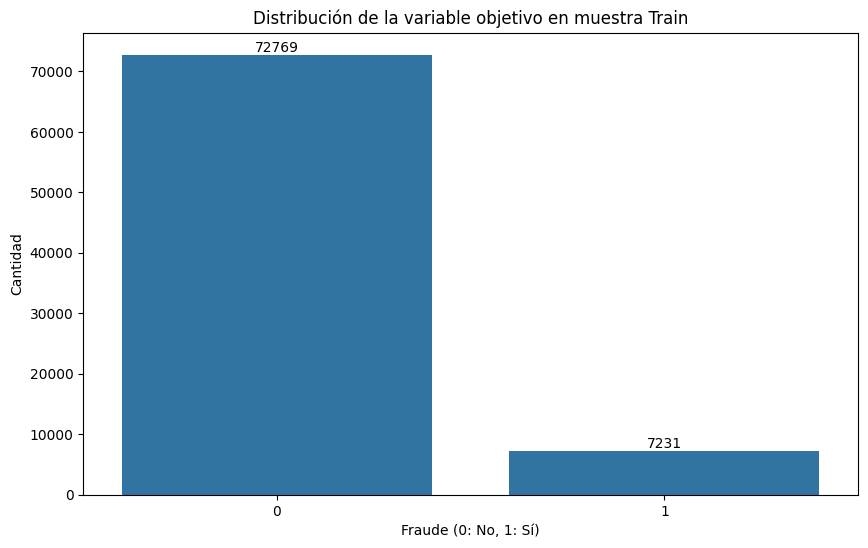

In [ ]:
#Analizar desbalance de clases

class_dist = df_train['isFraud'].value_counts(normalize=True)
print("\nPorcentajes:")
for clase, porcentaje in class_dist.items():
    print(f"Clase {clase}: {porcentaje*100:.2f}%")

# Visualizamos la distribución con un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='isFraud')
plt.title('Distribución de la variable objetivo en muestra Train')
plt.xlabel('Fraude (0: No, 1: Sí)')
plt.ylabel('Cantidad')

# Añadimos los valores exactos sobre cada barra
for i in plt.gca().containers[0]:
    plt.text(i.get_x() + i.get_width()/2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha='center', va='bottom')

plt.show()

Como se observa en la gráfica, la distribucuión de los datos para la ariable objetivo, la cual detecta si la transacción es fraude, está desbalanceada.

In [ ]:
#Eliminar valores de NA de la variable de interés
df_train = df_train.dropna(subset=['isFraud'])

#Separar los datos de entrada X como variables explicativas y la variable a predecir Y en df_train
X_train,y_train = df_train.drop(['isFraud'], axis=1), df_train['isFraud']
display(X_train.head())
display(y_train.head())

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,83567.84,1270,0.00,83567.84,17600,34594.35,34594.35,0,1,0,0,0,0
1,1221867.91,70795,1221867.91,0.00,22281,34873.36,34873.36,0,0,1,0,0,0
2,322138.17,2881,1595257.55,1917395.71,37826,121986.83,121986.83,0,1,0,0,0,0
3,89476.25,21364,1018602.32,1108078.57,32142,44718.52,44718.52,0,1,0,0,0,0
4,14372.57,20391,603534.13,617906.69,9164,108732.54,108732.54,0,1,0,0,0,0


,isFraud
0,0
1,1
2,0
3,0
4,0


In [ ]:
#Valores nulos
X_train.isnull().sum()

,0
amount,0
nameOrig,0
oldBalanceOrig,0
newBalanceOrig,0
nameDest,0
oldBalanceDest,0
newBalanceDest,0
isUnauthorizedOverdraft,0
action__CASH_IN,0
action__CASH_OUT,0


Como se observa que las observaciones no tienen valores nulos, no es necesario reemplazar los valores

In [ ]:
#Estandarizar los valores de las variables
from sklearn.preprocessing import StandardScaler

df_train_numerico = df_train.select_dtypes(include=['number'])

# Aplicar StandardScaler
scaler = StandardScaler()
df_train_estandarizado = scaler.fit_transform(df_train_numerico)

# Convertir el resultado en DataFrame
df_train_estandarizado = pd.DataFrame(df_train_estandarizado, columns=df_train_numerico.columns)

# Unir con las columnas no numéricas
df_train_st = df_train.drop(columns=df_train_numerico.columns).reset_index(drop=True)
df_train_st = pd.concat([df_train_st, df_train_estandarizado], axis=1)

# Mostrar las primeras filas del DataFrame final
df_train_st .head()

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,-0.298622,-0.611012,-1.516669,-1.357849,-0.364526,-0.143340,-0.237625,-0.315229,-0.103445,0.813672,-0.454713,-0.160497,-0.380896,-0.285132
1,1.699373,2.263761,-0.687385,-1.412629,-0.207602,-0.141982,-0.237050,3.172298,-0.103445,-1.228997,2.199189,-0.160497,-0.380896,-0.285132
2,0.120127,-0.544399,-0.433965,-0.155738,0.313522,0.281823,-0.057397,-0.315229,-0.103445,0.813672,-0.454713,-0.160497,-0.380896,-0.285132
3,-0.288251,0.219850,-0.825342,-0.686261,0.122974,-0.094086,-0.216746,-0.315229,-0.103445,0.813672,-0.454713,-0.160497,-0.380896,-0.285132
4,-0.420077,0.179618,-1.107049,-1.007579,-0.647331,0.217341,-0.084731,-0.315229,-0.103445,0.813672,-0.454713,-0.160497,-0.380896,-0.285132


###Análisis Descriptivo datos de prueba

In [ ]:
#Análisis de los datos de prueba:
df_test.head()

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,73800.89,15374,2534460.75,2460659.86,35922,81483.02,81483.02,0,0,0,1,0,0,0
1,196871.36,14559,1539057.79,1735929.16,48287,54029.17,54029.17,0,0,1,0,0,0,0
2,230141.98,22934,502864.24,733006.22,31892,8058.23,8058.23,0,0,1,0,0,0,0
3,227774.04,8379,60025.05,287799.09,978,11786.02,11786.02,0,0,1,0,0,0,0
4,65725.33,5391,2851847.83,2917573.16,35100,21051.19,21051.19,0,0,1,0,0,0,0


In [ ]:
#Análisis descriptivo de los datos de prueba:
from ydata_profiling import ProfileReport
reporte_test = ProfileReport(df_test, title="Profiling Report Test dataset")
reporte_test.to_file("reporte_test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

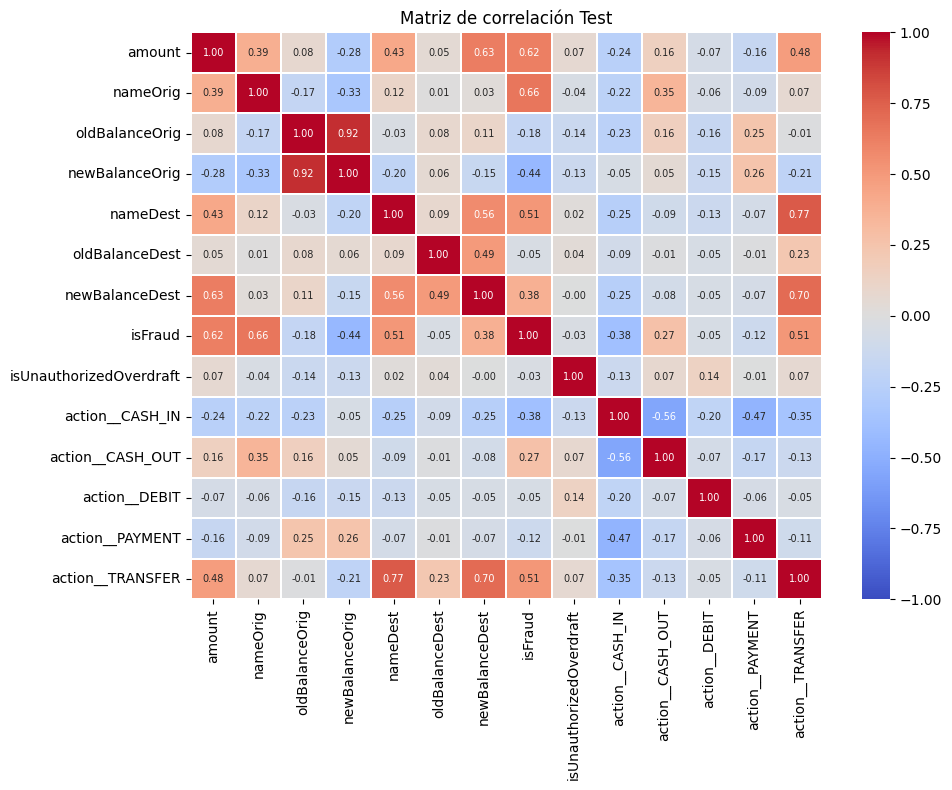

In [ ]:
#Hacer matriz de correlación

numeric_df_test = df_test.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df_test.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 7}, fmt=".2f", linewidths=0.3)

plt.title('Matriz de correlación Test', fontsize=12)
plt.tight_layout()
plt.show()


Porcentajes:
Clase 0: 91.22%
Clase 1: 8.78%


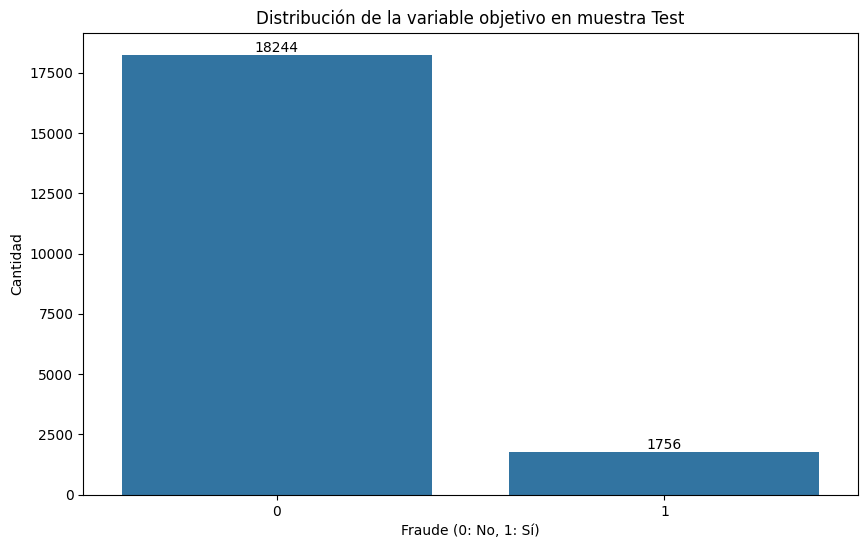

In [ ]:
#Analizar desbalance de clases

class_dist = df_test['isFraud'].value_counts(normalize=True)
print("\nPorcentajes:")
for clase, porcentaje in class_dist.items():
    print(f"Clase {clase}: {porcentaje*100:.2f}%")

# Visualizamos la distribución con un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='isFraud')
plt.title('Distribución de la variable objetivo en muestra Test')
plt.xlabel('Fraude (0: No, 1: Sí)')
plt.ylabel('Cantidad')

# Añadimos los valores exactos sobre cada barra
for i in plt.gca().containers[0]:
    plt.text(i.get_x() + i.get_width()/2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha='center', va='bottom')

plt.show()

Como se observa en la gráfica, la distribucuión de los datos para la ariable objetivo, la cual detecta si la transacción es fraude, está desbalanceada.

In [ ]:
#Eliminar valores de NA de la variable de interés
df_test = df_test.dropna(subset=['isFraud'])

#Separar los datos de entrada X como variables explicativas y la variable a predecir Y en df_test
X_test,y_test = df_test.drop(['isFraud'], axis=1), df_test['isFraud']
display(X_test.head())
display(y_test.head())

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,73800.89,15374,2534460.75,2460659.86,35922,81483.02,81483.02,0,0,1,0,0,0
1,196871.36,14559,1539057.79,1735929.16,48287,54029.17,54029.17,0,1,0,0,0,0
2,230141.98,22934,502864.24,733006.22,31892,8058.23,8058.23,0,1,0,0,0,0
3,227774.04,8379,60025.05,287799.09,978,11786.02,11786.02,0,1,0,0,0,0
4,65725.33,5391,2851847.83,2917573.16,35100,21051.19,21051.19,0,1,0,0,0,0


,isFraud
0,0
1,0
2,0
3,0
4,0


In [ ]:
#Reemplazar los valores nulos
X_test.isnull().sum()

,0
amount,0
nameOrig,0
oldBalanceOrig,0
newBalanceOrig,0
nameDest,0
oldBalanceDest,0
newBalanceDest,0
isUnauthorizedOverdraft,0
action__CASH_IN,0
action__CASH_OUT,0


Como se observa que las observaciones no tienen valores nulos, no es necesario reemplazar los valores.

In [ ]:
#Estandarizar los valores de las variables
from sklearn.preprocessing import StandardScaler

df_test_numerico = df_test.select_dtypes(include=['number'])

# Aplicar StandardScaler
scaler = StandardScaler()
df_test_estandarizado = scaler.fit_transform(df_test_numerico)

# Convertir el resultado en DataFrame
df_test_estandarizado = pd.DataFrame(df_test_estandarizado, columns=df_test_numerico.columns)

# Unir con las columnas no numéricas
df_test_st = df_test.drop(columns=df_test_numerico.columns).reset_index(drop=True)
df_test_st = pd.concat([df_test_st, df_test_estandarizado], axis=1)

# Mostrar las primeras filas del DataFrame final
df_test_st .head()

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,-0.310846,-0.021353,0.204344,0.199472,0.244091,0.081244,-0.139103,-0.310243,-0.103999,-1.238763,2.228984,-0.158478,-0.382444,-0.284542
1,-0.094376,-0.055562,-0.473332,-0.278806,0.657378,-0.047949,-0.195280,-0.310243,-0.103999,0.807257,-0.448635,-0.158478,-0.382444,-0.284542
2,-0.035856,0.295977,-1.178777,-0.940675,0.109392,-0.264281,-0.289346,-0.310243,-0.103999,0.807257,-0.448635,-0.158478,-0.382444,-0.284542
3,-0.040021,-0.314967,-1.480264,-1.234485,-0.923878,-0.246738,-0.281718,-0.310243,-0.103999,0.807257,-0.448635,-0.158478,-0.382444,-0.284542
4,-0.325050,-0.440388,0.420422,0.501007,0.216616,-0.203138,-0.262760,-0.310243,-0.103999,0.807257,-0.448635,-0.158478,-0.382444,-0.284542
